<a href="https://colab.research.google.com/github/jcjimenezb123/MetodosNumericosPython/blob/master/EDPParabolicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Metodo explicito

In [8]:
L=10
dx=2
dt=0.1
alfa=0.835
lamda=alfa*dt/dx**2
Tx0=100
Tx10=50

n=200
m=L//dx

u=np.zeros((m+1,n))
u[0,]=Tx0
u[m,]=Tx10
u

array([[100., 100., 100., ..., 100., 100., 100.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [ 50.,  50.,  50., ...,  50.,  50.,  50.]])

In [9]:
for tj in range(n-1):
  for xi in range(1,m):
    u[xi,tj+1]=(1-2*lamda)*u[xi,tj]+lamda*(u[xi+1,tj]+u[xi-1,tj])

u[:,:3]

array([[1.00000000e+02, 1.00000000e+02, 1.00000000e+02],
       [0.00000000e+00, 2.08750000e+00, 4.08784688e+00],
       [0.00000000e+00, 0.00000000e+00, 4.35765625e-02],
       [0.00000000e+00, 0.00000000e+00, 2.17882812e-02],
       [0.00000000e+00, 1.04375000e+00, 2.04392344e+00],
       [5.00000000e+01, 5.00000000e+01, 5.00000000e+01]])

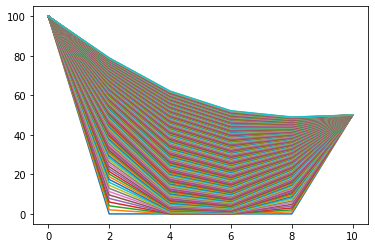

In [10]:
plt.plot(np.linspace(0,L,m+1),u);

#Metodo implicito simple

In [ ]:
L=10
dx=2
dt=0.1
alfa=0.835
lamda=alfa*dt/dx**2
T0=0
Tx0=100
Tx10=50

In [ ]:
n=200
m=L//dx-1
u=np.zeros((m+2,n))
u[0,]=Tx0
u[m+1,]=Tx10
u[1:m,0]=T0
u

array([[100., 100., 100., ..., 100., 100., 100.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [ 50.,  50.,  50., ...,  50.,  50.,  50.]])

In [ ]:
A=np.diag([-lamda]*(m-1),-1) + np.diag([1+2*lamda]*m) + np.diag([-lamda]*(m-1),1)
A

4

In [ ]:
b=np.zeros(m)
#ciclo del tiempo
for j in range(n-2):
  b=u[1:m+1,j].copy()
  b[0]=b[0]+lamda*u[0,j+1]
  b[-1]=b[-1]+lamda*u[-1,j+1]

  #solucions del sistema
  sol=np.linalg.solve(A,b)

  #asinga los resultados
  u[1:m+1,j+1]=sol

u[:,:4]

array([[1.00000000e+02, 1.00000000e+02, 1.00000000e+02, 1.00000000e+02],
       [0.00000000e+00, 2.00465303e+00, 3.93053648e+00, 5.78151161e+00],
       [0.00000000e+00, 4.05888074e-02, 1.18962699e-01, 2.32490709e-01],
       [0.00000000e+00, 2.08985938e-02, 6.18268666e-02, 1.21937311e-01],
       [0.00000000e+00, 1.00233862e+00, 1.96532686e+00, 2.89092614e+00],
       [5.00000000e+01, 5.00000000e+01, 5.00000000e+01, 5.00000000e+01]])

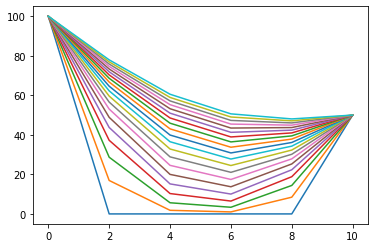

In [ ]:
plt.plot(np.linspace(0,L,m+2),u[:,::10]);

#Metodo implicito de Crank-Nicolson

In [11]:
L=10
dx=2
dt=0.1
alfa=0.835
lamda=alfa*dt/dx**2
T0=0
Tx0=100
Tx10=50

In [ ]:
n=40
m=L//dx-1
u=np.zeros((m+2,n))
u[0,]=Tx0
u[m+1,]=Tx10
u[1:m,0]=T0
u

In [17]:
b=np.zeros(m)

A=np.diag([-lamda]*(m-1),-1) + np.diag([2*(lamda+1)]*m) + np.diag([-lamda]*(m-1),1)

A

array([[ 2.04175 , -0.020875,  0.      ,  0.      ],
       [-0.020875,  2.04175 , -0.020875,  0.      ],
       [ 0.      , -0.020875,  2.04175 , -0.020875],
       [ 0.      ,  0.      , -0.020875,  2.04175 ]])

In [22]:
#ciclo del tiempo
for j in range(1,n):
  for i in range(m):
    b[i]=lamda*u[i,j-1]+2*(lamda+1)*u[i+1,j-1]+lamda*u[i+2,j-1]

  b[0]=b[0]+lamda*u[0,j]
  b[-1]=b[-1]+lamda*u[-1,j]

  #solucions del sistema
  sol=np.linalg.solve(A,b)

  #asinga los resultados
  u[1:-1,j]=sol

u[:,:5].round(4)

array([[1.0000e+02, 1.0000e+02, 1.0000e+02, 1.0000e+02, 1.0000e+02],
       [0.0000e+00, 2.0450e+00, 4.0909e+00, 6.1385e+00, 8.1888e+00],
       [0.0000e+00, 2.1000e-02, 8.4300e-02, 1.9030e-01, 3.3960e-01],
       [0.0000e+00, 1.0700e-02, 4.3100e-02, 9.8200e-02, 1.7690e-01],
       [0.0000e+00, 1.0225e+00, 2.0455e+00, 3.0693e+00, 4.0945e+00],
       [5.0000e+01, 5.0000e+01, 5.0000e+01, 5.0000e+01, 5.0000e+01]])

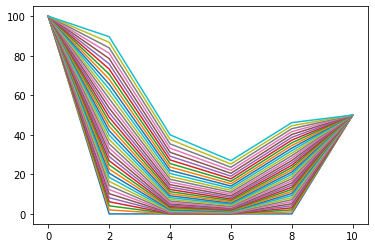

In [23]:
plt.plot(np.linspace(0,L,m+2),u);